# This program uses the dual moving average crossover to determine when to buy and sell stock
    

In [2]:
#Imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import quandl

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


YOURAPIKEY = <YOUR QUANDL API KEY>

In [3]:
company_ticker = 'AMZN'
min_date = '2014-01-01'

In [4]:
#Load the data
get_data_string = 'WIKI/' + company_ticker
company_data = quandl.get(get_data_string, api_key=YOURAPIKEY)
company_data = company_data[company_data.index >= min_date]
company_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-01-02,398.80,399.36,394.02,397.97,2137800.0,0.0,1.0,398.80,399.36,394.02,397.97,2137800.0
2014-01-03,398.29,402.71,396.22,396.44,2210200.0,0.0,1.0,398.29,402.71,396.22,396.44,2210200.0
2014-01-06,395.85,397.00,388.42,393.63,3170600.0,0.0,1.0,395.85,397.00,388.42,393.63,3170600.0
2014-01-07,395.04,398.47,394.29,398.03,1916000.0,0.0,1.0,395.04,398.47,394.29,398.03,1916000.0
2014-01-08,398.47,403.00,396.04,401.92,2316500.0,0.0,1.0,398.47,403.00,396.04,401.92,2316500.0


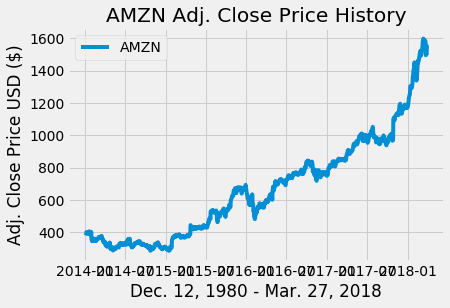

In [5]:
#Visualize the Data

plt.plot(company_data['Adj. Close'], label = company_ticker)
plt.title(company_ticker + ' Adj. Close Price History')
plt.xlabel('Dec. 12, 1980 - Mar. 27, 2018')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Create the simple moving 30 day average
SMA30=pd.DataFrame()
SMA30['Adj. Close'] = company_data['Adj. Close'].rolling(window=30).mean()
SMA30.tail()


,Adj. Close
Date,
2018-03-21,1504.215333
2018-03-22,1508.459333
2018-03-23,1513.295667
2018-03-26,1520.524667
2018-03-27,1524.218667


In [7]:
#Create the simple moving 100 day average
SMA100=pd.DataFrame()
SMA100['Adj. Close'] = company_data['Adj. Close'].rolling(window=100).mean()
SMA100.tail()


,Adj. Close
Date,
2018-03-21,1297.1925
2018-03-22,1302.9044
2018-03-23,1308.1357
2018-03-26,1312.6848
2018-03-27,1316.5468


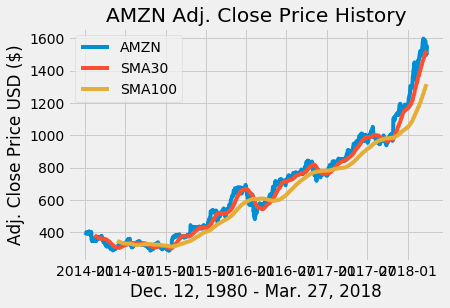

In [8]:
#Visualize the Data

plt.plot(company_data['Adj. Close'], label = company_ticker)
plt.plot(SMA30['Adj. Close'], label = 'SMA30')
plt.plot(SMA100['Adj. Close'], label = 'SMA100')
plt.title(company_ticker + ' Adj. Close Price History')
plt.xlabel('Dec. 12, 1980 - Mar. 27, 2018')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
#Create a new dataframe to store all the data
data = pd.DataFrame()
data[company_ticker] = company_data['Adj. Close']
data['SMA30'] = SMA30['Adj. Close']
data['SMA100'] = SMA100['Adj. Close']
data.tail()

,AMZN,SMA30,SMA100
Date,,,
2018-03-21,1581.86,1504.215333,1297.1925
2018-03-22,1544.10,1508.459333,1302.9044
2018-03-23,1495.56,1513.295667,1308.1357
2018-03-26,1555.86,1520.524667,1312.6848
2018-03-27,1497.05,1524.218667,1316.5468


In [10]:
#Create a function to signal when to buy and sell the stock
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data[company_ticker][i])
                sigPriceSell.append(np.nan)
                flag =1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[company_ticker][i]) 
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)                                 

In [11]:
#Store the buy sell data in a variable

buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

data.tail()

,AMZN,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2018-03-21,1581.86,1504.215333,1297.1925,NaN,NaN
2018-03-22,1544.10,1508.459333,1302.9044,NaN,NaN
2018-03-23,1495.56,1513.295667,1308.1357,NaN,NaN
2018-03-26,1555.86,1520.524667,1312.6848,NaN,NaN
2018-03-27,1497.05,1524.218667,1316.5468,NaN,NaN


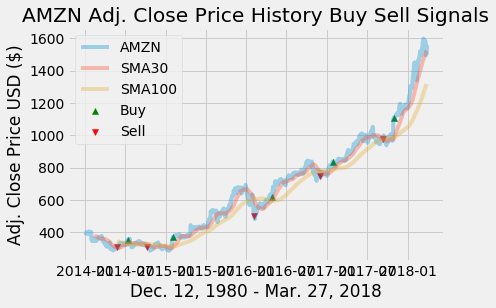

In [12]:
#Plot the data

plt.plot(company_data['Adj. Close'], label = company_ticker, alpha=0.35)
plt.plot(SMA30['Adj. Close'], label = 'SMA30', alpha=0.35)
plt.plot(SMA100['Adj. Close'], label = 'SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy',marker='^',color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell',marker='v',color='red')
plt.title(company_ticker + ' Adj. Close Price History Buy Sell Signals')
plt.xlabel('Dec. 12, 1980 - Mar. 27, 2018')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()
